In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
# Step 1: Define transformations for both original and augmented images
# Original images (no augmentation)
original_transform = transforms.Compose([
    transforms.ToTensor()
])

# Augmented images
augmentations = transforms.Compose([
    transforms.RandomRotation(degrees=30),          # Randomly rotate images within 30 degrees
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),  # Random crop with scaling
    transforms.RandomHorizontalFlip(),              # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Random translation
    transforms.ToTensor()                           # Convert to tensor
])

In [24]:
# Step 2: Load the MNIST dataset with augmentations applied
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=original_transform
)

In [25]:
# Step 3: Create DataLoader for original images
original_loader = DataLoader(mnist_dataset, batch_size=25, shuffle=True)

In [26]:
# Step 4: Augment images manually
def augment_images(dataset, transform, num_images = 25):
    augmented_images = []
    original_images = []
    labels = []
    for i in range(num_images):
        image,label = dataset[i]
        pil_image = transforms.ToPILImage()(image) 
        augment_image = transform(pil_image)
        original_images.append(image)
        augmented_images.append(augment_image)
        labels.append(label)
    return original_images, augmented_images,labels

# Apply augmentations to a batch
original_images, augmented_images, labels = augment_images(mnist_dataset, augmentations, num_images=25)


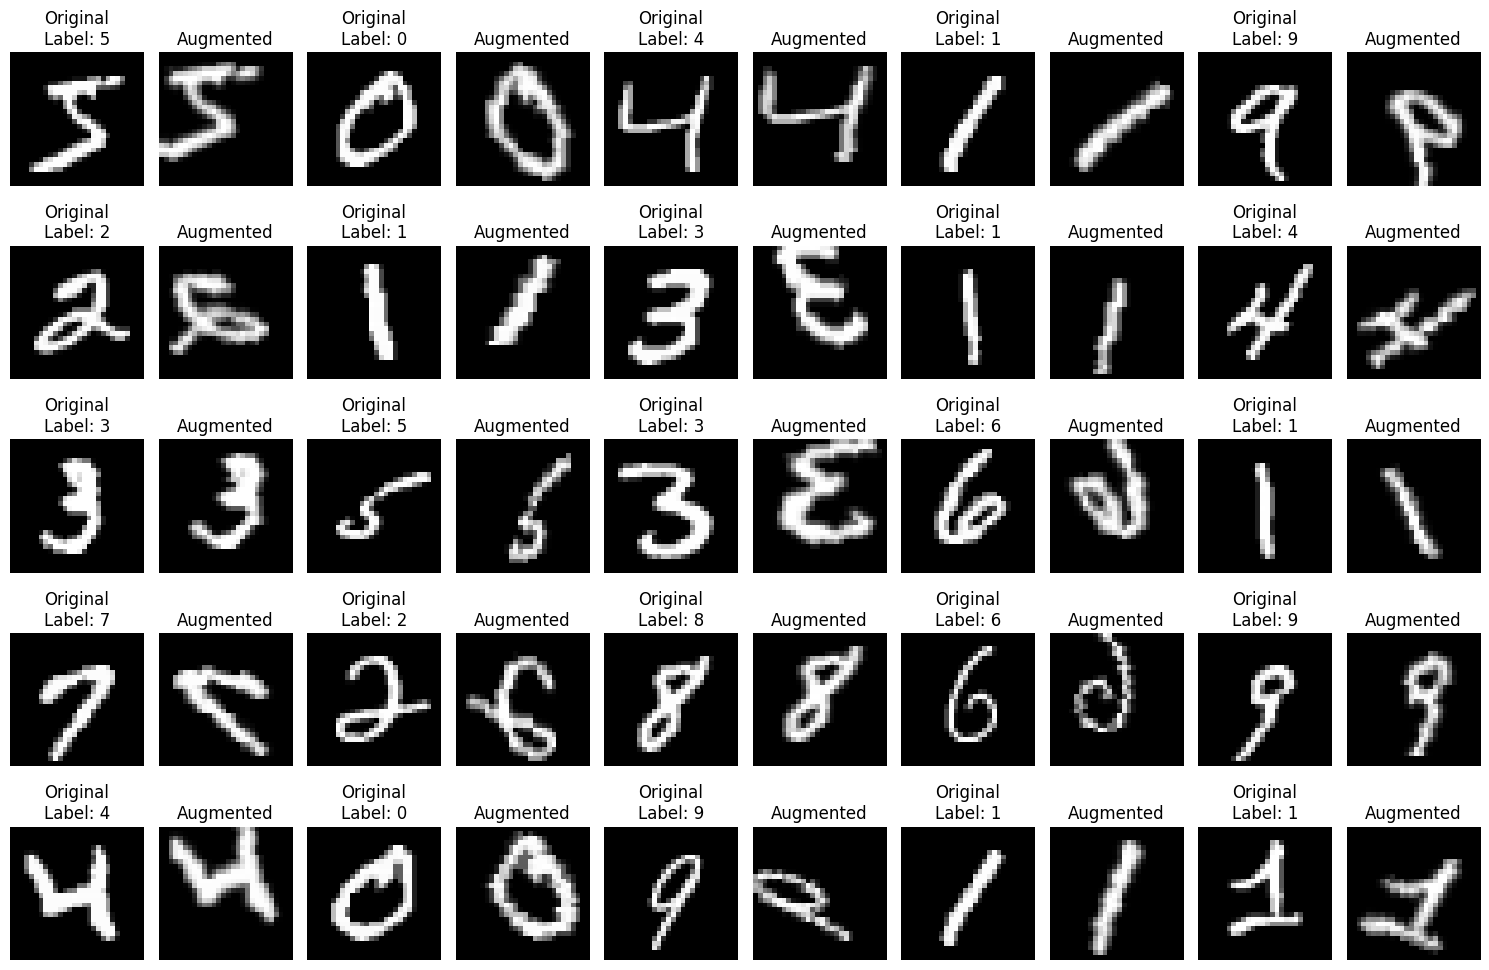

In [ ]:
# Step 5: Plot original and augmented images side-by-side
def plot_side_by_side(original_images, augmented_images, labels):
    fig, axes = plt.subplots(5, 10, figsize=(10, 5))  # 5 rows, 10 columns (original + augmented)
    for i, ax in enumerate(axes.flatten()):
        if i % 2 == 0:  # Original image
            img = original_images[i // 2].squeeze(0)  # Remove channel dimension for grayscale
            ax.imshow(img, cmap='gray')
            ax.set_title(f"Original\nLabel: {labels[i // 2]}")
        else:  # Augmented image
            img = augmented_images[i // 2].squeeze(0)  # Remove channel dimension for grayscale
            ax.imshow(img, cmap='gray')
            ax.set_title("Augmented")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display the side-by-side comparison
plot_side_by_side(original_images, augmented_images, labels)